In [1]:
import numpy as np
import matplotlib.pyplot as plt
from image_analyzer import Image_analyzer
import os

In [2]:
file_dir = os.getcwd()
images_dir = file_dir+'/images/'
fig_03_38_path = images_dir+'Fig0338(a)(blurry_moon).pgm'

fig_03_38_analyzer = Image_analyzer(fig_03_38_path)
#read image
fig_03_38_analyzer.mypgmread()

Reading image from: /Users/fuad/Documents/coding/image_processing_tutorials/003_pgn_shapening_and_histogram/images/Fig0338(a)(blurry_moon).pgm


(array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 466,
 540,
 255)

In [11]:
laplacian_filter = np.array([[0, 1, 0],
                             [1, -4, 1],
                             [0, 1, 0]])
laplacian_image_without_scaling = fig_03_38_analyzer.myImageCorrelation(laplacian_filter)
laplacian_image_scaled = Image_analyzer().image_array_scale(laplacian_image_without_scaling)
sharp_image = fig_03_38_analyzer.get_image_array() + laplacian_image_without_scaling
sharp_image_scaled = Image_analyzer().image_array_scale(sharp_image)
print(np.min(sharp_image_scaled), np.max(sharp_image_scaled))
#find the 0 and 255 values indices
zero_indices = np.where(sharp_image_scaled == 0)
max_indices = np.where(sharp_image_scaled == 255)
print(zero_indices)
print(max_indices)


0 255
(array([481, 482]), array([327, 324]))
(array([248]), array([55]))


Text(0.5, 1.0, 'Fig3.4 (d): Sharpened Image with scaling')

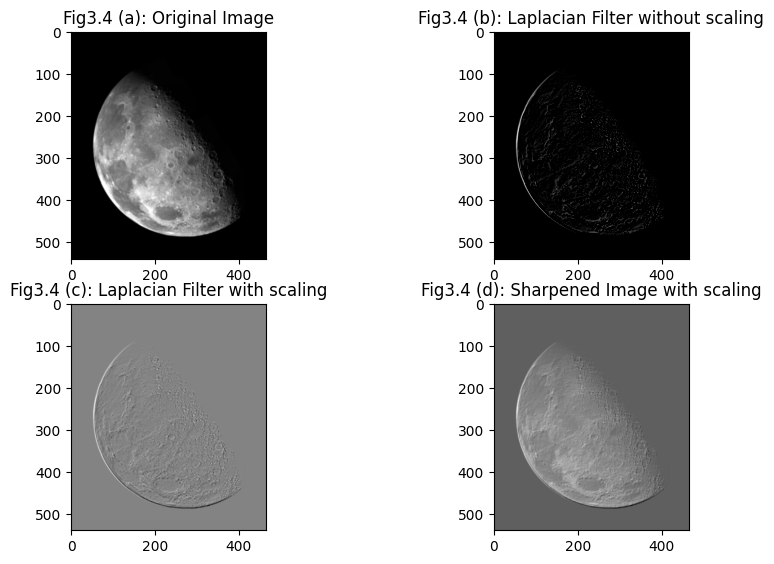

In [6]:
plt.figure(figsize=(10, 10))

plt.subplot(3, 2, 1)
plt.imshow(fig_03_38_analyzer.get_image_array(), cmap='gray', vmin=0, vmax=255)
plt.title('Fig3.4 (a): Original Image')

plt.subplot(3, 2, 2)
plt.imshow(laplacian_image_without_scaling, cmap='gray', vmin=0, vmax=255)
plt.title('Fig3.4 (b): Laplacian Filter without scaling')

plt.subplot(3, 2, 3)
plt.imshow(laplacian_image_scaled, cmap='gray', vmin=0, vmax=255)
plt.title('Fig3.4 (c): Laplacian Filter with scaling')

plt.subplot(3, 2, 4)
plt.imshow(sharp_image_scaled, cmap='gray', vmin=0, vmax=255)
plt.title('Fig3.4 (d): Sharpened Image with scaling')

